# 目標:
學習 BASEMAP的進階應用


# 重點:

導入PANDAS, 利用PANDAS 的數據繪製關係圖

如何自行輸入經緯度繪製所在區域的地圖

學習如何讀取氣象資訊檔: netCDF4


# 作業

1. 讀入 etopo5 地形/降水量資料集: "etopo5.cdf". 繪製分布圖.


2. 延續使用者資料的導入使用, 除了, "文字檔", "網路資訊", 還有圖像檔;

所以嘗試使用一張"earth_lights_lrg.jpg" 搭配不同的投影方式繪製地圖



# 溫馨提示: 

有疑問, 請多提出來, 有專家陪跑

<ipython-input-17-a0b08e5cc294>:64: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  m.pcolormesh(x, y, data_interp, cmap='RdBu_r')


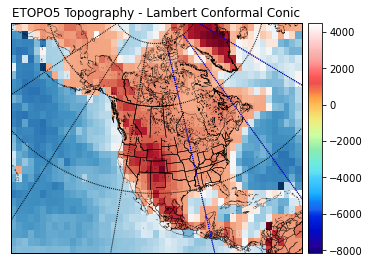

In [17]:
import os
from mpl_toolkits.basemap import Basemap, shiftgrid, cm
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset

# 讀入 etopo5 地形/降水量。.
#url = 'https://github.com/NOAA-PMEL/FerretDatasets/blob/master/data/etopo5.cdf'
# 要確認資料集所在路徑
etopodata = Dataset(os.path.join('HWDATASET','etopo5.cdf'))
# print(etopodata)

# 取得資料集裡的資料定義, 使用variables.keys()
etopodata.variables.keys()

# 匯入資料 使用variables['keys'][:]
topoin = etopodata.variables['ROSE'][:]
lons = etopodata.variables['ETOPO05_X'][:]
lats = etopodata.variables['ETOPO05_Y'][:]

# # 移位資料, 使 lon 從 - 180 到 180, 而不是 20 到 380 
topoin, lons = shiftgrid(180.,topoin,lons,start=False)

# 繪製地形/降水量
# 創建圖形和軸實例
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])

#設定地理資訊圖('lcc' = lambert conformal conic).
# 使用 Wgs84 橢圓體的主要和次要球體半徑, 做基礎的底圖
# 請填入 resolution='??',area_thresh=???.,projection='??'
# area_thresh 為一數字, 低於這個數字不呈現

m = Basemap(llcrnrlon=-145.5, llcrnrlat=1., urcrnrlon=-2.566, urcrnrlat=46.352,\
            rsphere=(6378137.00,6356752.3142),\
            resolution='l', area_thresh=0., projection='lcc',\
            lat_1=50.,lon_0=-107.,ax=ax)
# m.bluemarble()

# http://www2.nkust.edu.tw/~shanhuen/PythonTutorialHtml/BaseMap/BaseMap1.html
# area_thresh=1000 表示不要繪製小於1000 km2的面積，顯然數字越小則需越長時間繪製。
# 至於projection參數的值則有許多，e.q. cyl(default, Cylindrical Equidistant projection)、ortho、robin、aeqd、nsper 等。
# 有些則需要搭配其他參數方能顯示(ortho需搭配lat_0與lon_0參數)，或例如gnom需搭配寬(width)高(height):


# # 轉換為 nx x ny 定期分空 5km 本機投影網格
nx = int((m.xmax-m.xmin)/5000.)+1; ny = int((m.ymax-m.ymin)/5000.)+1
topodat = m.transform_scalar(topoin,lons,lats,nx,ny)
# plot image over map with imshow.
# transform_scalar(datin, lons, lats, nx, ny, returnxy=False, checkbounds=False, order=1, masked=False)
# datain is a 2d numpy array with the scalar values
# lons, lats are 1D numpy arrays with the positions of the uin an vin matrices, in geographical coordinates. The input lon-lat grid has to be regular (projections cyl, merc, mill, cea and gall)
# nx and ny are the x any y dimensions of the output grid. The output grid covers all the map, not the original points outside its domain. So the final number of points visible on the map will be nx x ny
# returnxy makes the method to return the lons and lats matrices reprojected to the map coordinates. Just as calling the basemap instance
# checkbounds if set to True, the xin and yin values are checked to be in the bounds of xout and yout. If False, and there are values outside the bounds, the output data array values will be clipped to the boundary values
# masked makes the points outside the new grid to be masked if is set to True, or an arbitrary value if given
# order sets the interpolation method:
# 0 uses the nearest neighbor method
# 1 uses a bilinear interpolation
# 3 uses a cubic spline, and requires scipy.ndimage to be installed
im = m.imshow(topodat,cm.GMT_haxby)
data_interp, x, y = m.transform_scalar(topoin, lons, lats, 50, 30, returnxy=True, masked=True)

m.pcolormesh(x, y, data_interp, cmap='RdBu_r')

# #劃定海岸線和邊境界限, 總共需要3個參數

m.drawcoastlines(linewidth=0.25)
# draw the edge of the map projection region
m.drawmapboundary(fill_color='white')
# draw lat/lon grid lines every 30 degrees.
m.drawmeridians(np.arange(0,360,30), color="black" )


# # 繪製經緯線
# # 設定地圖左側和底部的標籤
# parallels = np.arange( )
m.drawparallels(np.arange(-90,90 ,30), color="black" )
# meridians = np.arange()
m.drawmeridians(np.arange(-90,90 ,30), color="blue" )
m.drawstates(color="black")


# # 加入 colorbar
cb = m.colorbar(im,"right", size="5%", pad='2%')
ax.set_title('ETOPO5 Topography - Lambert Conformal Conic')
plt.show()

dict_keys(['ETOPO05_X', 'ETOPO05_Y', 'ROSE'])


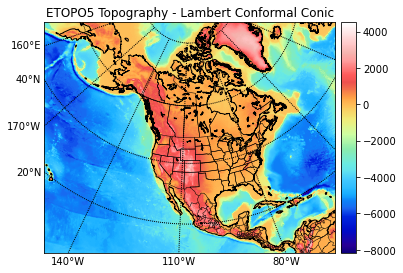

In [6]:
import os
from mpl_toolkits.basemap import Basemap, shiftgrid, cm
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset

# 讀入 etopo5 地形/降水量。.
#url = 'https://github.com/NOAA-PMEL/FerretDatasets/blob/master/data/etopo5.cdf'
# 要確認資料集所在路徑
etopodata = Dataset(os.path.join('HWDATASET','etopo5.cdf'))
etopodata

'''
從這裡開始寫code
# 取得資料集裡的資料定義, 使用variables.keys()

# 匯入資料 使用variables['keys'][:]

# 移位資料, 使 lon 從 - 180 到 180, 而不是 20 到 380 
topoin,lons = shiftgrid(180.,topoin,lons,start=False)

# 繪製地形/降水量
# 創建圖形和軸實例
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])

#設定地理資訊圖('lcc' = lambert conformal conic).
# 使用 Wgs84 橢圓體的主要和次要球體半徑, 做基礎的底圖
# 請填入 resolution='??',area_thresh=???.,projection='??'
# area_thresh 為一數字, 低於這個數字不呈現

m = Basemap(llcrnrlon=-145.5,llcrnrlat=1.,urcrnrlon=-2.566,urcrnrlat=46.352,\
            rsphere=(6378137.00,6356752.3142),\
            resolution='??',area_thresh=???.,projection='??',\
            lat_1=50.,lon_0=-107.,ax=ax)

# 轉換為 nx x ny 定期分空 5km 本機投影網格
nx = int((m.xmax-m.xmin)/5000.)+1; ny = int((m.ymax-m.ymin)/5000.)+1
topodat = m.transform_scalar(topoin,lons,lats,nx,ny)
# plot image over map with imshow.
im = m.imshow(topodat,cm.GMT_haxby)
#劃定海岸線和邊境界限, 總共需要3個參數

1.
2.
3.

# 繪製經緯線
# 設定地圖左側和底部的標籤
parallels = np.arange(.....)
m.drawparallels(.........)
meridians = np.arange(.....)
m.drawmeridians(.........)
'''

# 加入 colorbar
cb = m.colorbar(im,"right", size="5%", pad='2%')
ax.set_title('ETOPO5 Topography - Lambert Conformal Conic')
plt.show()


In [ ]:
https://zh.wikipedia.org/wiki/File:R%27lyeh_locations.png

topoin = topopickle(etopodata,"ROSE")
lons   = topopickle(etopodata,"ETOPO05_X")
lats   = topopickle(etopodata,"ETOPO05_Y")
print "shift data so lons go from -180 to 180 instead of 20 to 380...",
sys.stdout.flush()
topoin,lons = shiftgrid(180.,topoin,lons,start=False)
print "ok"


# create the figure and axes instances.
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])

print "setup basemap"
# set up orthographic m projection with
# perspective of satellite looking down at 50N, 100W.
# use low resolution coastlines.
m = Basemap(projection='ortho',lat_0=nemo_lat,lon_0=nemo_lon,resolution='l')
m.bluemarble()

# Generic Mapping Tools colormaps:
# GMT_drywet, GMT_gebco, GMT_globe, GMT_haxby GMT_no_green, GMT_ocean, GMT_polar,
# GMT_red2green, GMT_relief, GMT_split, GMT_wysiwyg

print "transform to nx x ny regularly spaced native projection grid"
# step=5000.
step=10000.
nx = int((m.xmax-m.xmin)/step)+1; ny = int((m.ymax-m.ymin)/step)+1
topodat = m.transform_scalar(topoin,lons,lats,nx,ny)

print "plot topography/bathymetry as shadows"
from matplotlib.colors import LightSource
ls = LightSource(azdeg = 45, altdeg = 220, hsv_min_val=0.0, hsv_max_val=1.0,
        hsv_min_sat=0.0, hsv_max_sat=1.0)
# convert data to rgb array including shading from light source.
# (must specify color m)
rgb = ls.shade(topodat, cm.GMT_ocean)
im = m.imshow(rgb, alpha=0.15)

print "draw coastlines, country boundaries, fill continents"
m.drawcoastlines(linewidth=0.25)
# draw the edge of the map projection region
m.drawmapboundary(fill_color='white')
# draw lat/lon grid lines every 30 degrees.
m.drawmeridians(np.arange(  0,360,30), color="black" )
m.drawparallels(np.arange(-90,90 ,30), color="black" )

print "draw points"
psize=5
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 18}
matplotlib.rc('font', **font)

x,y = m( lovecraft_lon, lovecraft_lat )
m.scatter(x,y,psize,marker='o', color='white')
plt.text(x+50000,y+50000+50000, "Lovecraft", color='white')

x,y = m( derleth_lon, derleth_lat )
m.scatter(x,y,psize,marker='o',color='white')
plt.text(x+50000-120000,y+50000, "Derleth", color='white', horizontalalignment="right")

x,y = m( nemo_lon, nemo_lat )
m.scatter(x,y,psize*3,marker='+',color='#555555')
plt.text(x+50000+50000,y+50000-80000, "Nemo", color="#555555", verticalalignment="top")

equi(m, nemo_lon, nemo_lat, radius=2688, color="#555555" )

# x,y = m( bransfield_strait_lon, bransfield_strait_lat )
# m.scatter(x,y,psize*3,marker='+',color='#555555')
# plt.text(x+50000+20000,y+50000-80000, "bransfield_strait", color="#555555", verticalalignment="baseline")

# x,y = m( ross_sea_lon, ross_sea_lat )
# m.scatter(x,y,psize*3,marker='+',color='#555555')
# plt.text(x+50000+20000,y+50000-80000, "ross_sea", color="#555555", verticalalignment="baseline")

# x,y = m( cape_adare_lon, cape_adare_lat )
# m.scatter(x,y,psize*3,marker='+',color='#555555')
# plt.text(x+50000+20000,y+50000-80000, "cape_adare", color="#555555", verticalalignment="baseline")

plt.savefig("R'lyeh_locations.png", dpi=600, bbox_inches='tight')
# plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


warp to orthographic map ...


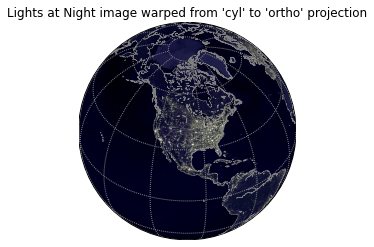

In [4]:
from __future__ import (absolute_import, division, print_function)

from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt

# 說明使用warpimage method 方法顯示圖像背景。
# 在地圖投影區域。 預設背景是『藍色。
#來自美國宇航局的大理石圖像 (http://visibleearth.nasa.gov)

# 建立新圖像
fig=plt.figure()
# 定義以北美為中心的正交投影.
m = Basemap(projection='ortho',lat_0=40,lon_0=-100,resolution='l')
# 顯示非預設影像 - 匯入要使用的IMAGE
m.warpimage(image='earth_lights_lrg.jpg')
# 繪製海岸線。
m.drawcoastlines(linewidth=0.5,color='0.5')
# 每 30 度繪製一組 lat/lon 網格線。
m.drawmeridians(np.arange(0,360,30),color='0.5')
m.drawparallels(np.arange(-90,90,30),color='0.5')
#添加圖示標題
plt.title("Lights at Night image warped from 'cyl' to 'ortho' projection",fontsize=12)
print('warp to orthographic map ...')



plot native cylindrical map (no warping needed) ...


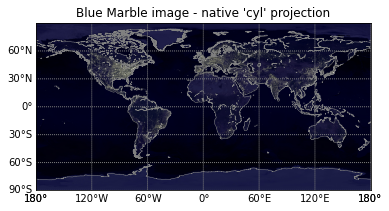

In [5]:

'''
從這裡開始寫code

# 建立新圖像
fig

#新定義圓柱形等距投影。
m = Basemap(projection='?? ',llcrnrlon=-180,llcrnrlat=-90,urcrnrlon=180,urcrnrlat=90,resolution='??')
# 繪圖 (未扭曲) rgba 圖像
im = m.bluemarble(scale=0.5)
m.warpimage(image='????')
# 繪製海岸線。

# 繪製經緯度網格
m.drawmeridians(np.arange(-180,180,60),labels=[0,0,0,1],color='0.5')
m.drawparallels(???)
'''

# 輸出圖像標題
plt.title("Blue Marble image - native 'cyl' projection",fontsize=12)
print('plot native cylindrical map (no warping needed) ...')

plt.show()

plot native cylindrical map (no warping needed) ...


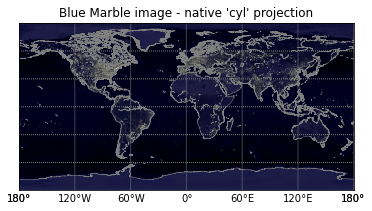

In [21]:
from __future__ import (absolute_import, division, print_function)

from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt

# 建立新圖像
fig=plt.figure()

#新定義圓柱形等距投影。
m = Basemap(projection='cyl',llcrnrlon=-180,llcrnrlat=-90,urcrnrlon=180,urcrnrlat=90,resolution='h')
# 繪圖 (未扭曲) rgba 圖像
im = m.bluemarble(scale=0.5)
m.warpimage(image=os.path.join('HWDATASET','earth_lights_lrg.jpg'))
# 繪製海岸線。
m.drawcoastlines(linewidth=0.5,color='0.5')
# 繪製經緯度網格
m.drawmeridians(np.arange(-180,180,60),labels=[0,0,0,1],color='0.5')
m.drawparallels(np.arange(-90,90 ,30),labels=[0,0,0,1], color='0.5' )

# 輸出圖像標題
plt.title("Blue Marble image - native 'cyl' projection",fontsize=12)
print('plot native cylindrical map (no warping needed) ...')
plt.show()